<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

from pprint import pprint

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
# from js import fetch
# import io

# URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
# data = pd.read_csv(text1)

In [5]:
import requests
import io
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

text1 = requests.get(URL1)

data = pd.read_csv(io.BytesIO(text1.content))

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
# URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = await fetch(URL2)
# text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
# X = pd.read_csv(text2)

In [8]:
import requests
import io
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

text2 = requests.get(URL2)

X = pd.read_csv(io.BytesIO(text1.content))

In [9]:
X.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this 
transform = preprocessing.StandardScaler()

numerical_features = ['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']
categorical_features = ['Orbit', 'LaunchSite']
boolean_features = ['GridFins', 'Reused', 'Legs']
num_bool_features = numerical_features + boolean_features

X = transform.fit(X[num_bool_features]).transform(X[num_bool_features].astype(float))
X.shape


(90, 8)

In [12]:
# check the stats after scaling
pd.DataFrame(X, columns = num_bool_features).describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,GridFins,Reused,Legs
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,-4.440892e-17,-5.304399e-17,-4.231183e-16,1.332268e-16,6.167906e-17,1.504969e-16,8.400688e-16,4.564250e-16
std,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00
min,-1.712912e+00,-1.232717e+00,-6.539128e-01,-1.575895e+00,-9.734405e-01,-1.870829e+00,-8.355317e-01,-1.933091e+00
25%,-8.564558e-01,-7.698824e-01,-6.539128e-01,-9.455367e-01,-9.734405e-01,5.345225e-01,-8.355317e-01,5.173061e-01
50%,0.000000e+00,-3.006221e-01,-6.539128e-01,3.151789e-01,-3.854563e-01,5.345225e-01,-8.355317e-01,5.173061e-01
75%,8.564558e-01,6.014309e-01,1.749908e-01,9.455367e-01,7.905120e-01,5.345225e-01,1.196843e+00,5.173061e-01
max,1.712912e+00,2.033845e+00,3.490605e+00,9.455367e-01,1.966480e+00,5.345225e-01,1.196843e+00,5.173061e-01


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [14]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [15]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [16]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)

logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [17]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8339285714285714


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [18]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

Lets look at the confusion matrix:


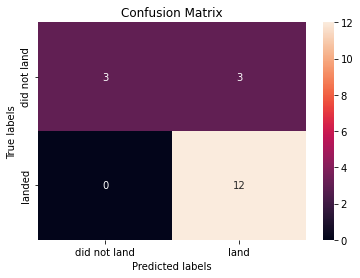

In [19]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:
parameters = {'kernel':('linear', 'rbf', 'sigmoid'), #('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [21]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'sigmoid')})

In [22]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8607142857142855


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [23]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


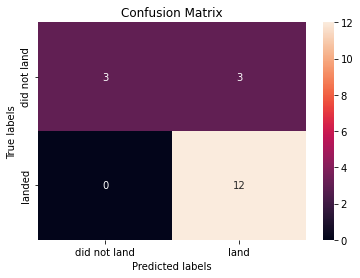

In [24]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [25]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [26]:
tree_cv = GridSearchCV(tree, parameters, cv=10)

tree_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8892857142857142


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [28]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


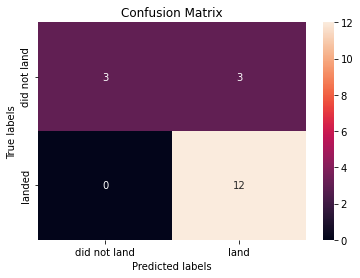

In [29]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [30]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [31]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)

knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [32]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2}
accuracy : 0.8339285714285714


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [33]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


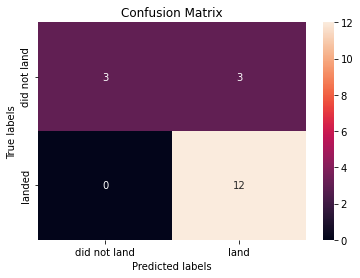

In [34]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [35]:
methods = {
    'Logistic Regression': logreg_cv,
    'Support Vector Machine': svm_cv,
    'Decision Tree': tree_cv,
    'K nearest neighbours': knn_cv
}

scores = {}
train_scores = {}

for method_name, method in methods.items():
    scores[method_name] = method.score(X_test, Y_test)
    train_scores[method_name] = method.best_score_


pprint(scores)
pprint(train_scores)

{'Decision Tree': 0.8333333333333334,
 'K nearest neighbours': 0.8333333333333334,
 'Logistic Regression': 0.8333333333333334,
 'Support Vector Machine': 0.8333333333333334}
{'Decision Tree': 0.8892857142857142,
 'K nearest neighbours': 0.8339285714285714,
 'Logistic Regression': 0.8339285714285714,
 'Support Vector Machine': 0.8607142857142855}


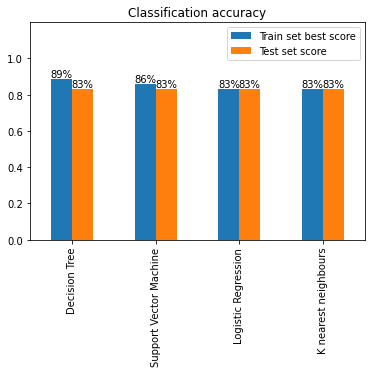

In [36]:
# visualize accuracy with a bar chart
ax = (
    pd.DataFrame(
        {'Train set best score': train_scores.values(),
          'Test set score': scores.values()},
        index = scores.keys())
    .sort_values('Train set best score', ascending=False)
    .plot(kind='bar', title='Classification accuracy', ylim=(0, 1.2), yticks=np.linspace(0, 1, 6), )
)

for container in ax.containers:
    ax.bar_label(container, labels = [f'{x.get_height():.0%}' for x in container])

plt.show()

#### Conclusion 1: **All methods provide the same results on the test set**


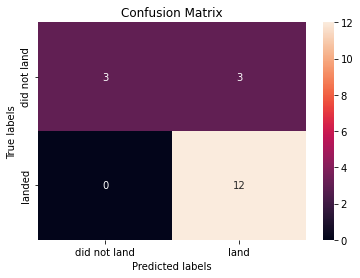

In [37]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [38]:
# Check if the false positives are always for the same samples
test_results = {
    'Y_test': Y_test
    }

for method_name, method in methods.items():
    test_results[method_name] = method.predict(X_test)

for name, values in test_results.items():
    print(f'{name:>25}, {values}')


                   Y_test, [1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1]
      Logistic Regression, [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]
   Support Vector Machine, [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]
            Decision Tree, [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]
     K nearest neighbours, [1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]


#### Conclusion 2: **The false positives are always coming from the same 3 samples of the test set**

In [42]:
# Check if the same score for all methods is just a result of a particular selection of the train and test sets
# repeat for 10 different random_state values

random_states = np.linspace(1, 1000, 10, dtype=int)

# define details of each method in a single dict
methods = {
    'Logistic Regression': dict(
        estimator = LogisticRegression,
        parameters = {'C':[0.01,0.1,1],
                        'penalty':['l2'],
                        'solver':['lbfgs']}),
    'Support Vector Machine': dict(
        estimator = SVC,
        parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
                        'C': np.logspace(-3, 3, 5),
                        'gamma':np.logspace(-3, 3, 5)}),
    'Tree': dict(
        estimator = DecisionTreeClassifier,
        parameters = {'criterion': ['gini', 'entropy'],
                        'splitter': ['best', 'random'],
                        'max_depth': [2*n for n in range(1,10)],
                        'max_features': ['auto', 'sqrt'],
                        'min_samples_leaf': [1, 2, 4],
                        'min_samples_split': [2, 5, 10]}),
    'K nearest neighbours': dict(
        estimator = KNeighborsClassifier,
        parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'p': [1,2]})
}

# dict to store scores for each method
results = {method_name: [] for method_name in methods.keys()}

for random_state in random_states:
    # print(f'=========== random_state = {random_state} =========')
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2, random_state=random_state)
    # print(f'{"Y_test":>25}, {Y_test2}')
    for method_name, method in methods.items():
        estimator = method.get('estimator')()
        parameters = method.get('parameters')
        method_cv = GridSearchCV(estimator, parameters, cv=10)
        method_cv.fit(X_train2, Y_train2)
        score = method_cv.score(X_test2, Y_test2)
        yhat = method_cv.predict(X_test2)
        # print(f'{method_name:>25}, {yhat}, {score:0.4f}')
        results[method_name].append(score)

        


In [43]:
pd.DataFrame(results).describe().T

,count,mean,std,min,25%,50%,75%,max
Logistic Regression,10.0,0.811111,0.111727,0.611111,0.736111,0.805556,0.888889,1.000000
Support Vector Machine,10.0,0.822222,0.081985,0.666667,0.777778,0.833333,0.833333,0.944444
Tree,10.0,0.794444,0.083024,0.666667,0.722222,0.805556,0.875000,0.888889
K nearest neighbours,10.0,0.838889,0.099553,0.666667,0.791667,0.833333,0.888889,1.000000


#### Conclusion 3: **Accuracy of a particular method does not seem to strongly depend on the selection of the train samples**

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
